          Método         N  Tempo (s)
       Iterativa   1000000   0.078250
       Analítica   1000000   0.000000
       Iterativa  10000000   0.661610
       Analítica  10000000   0.000000
       Iterativa 100000000   6.330822
       Analítica 100000000   0.000000
   Laço em Lista   1000000   0.078756
  sum() embutido   1000000   0.026587
   Laço em Lista  10000000   0.875938
  sum() embutido  10000000   0.443223
NumPy vetorizado   1000000   0.004011
NumPy vetorizado  10000000   0.020387
NumPy vetorizado 100000000   0.177854


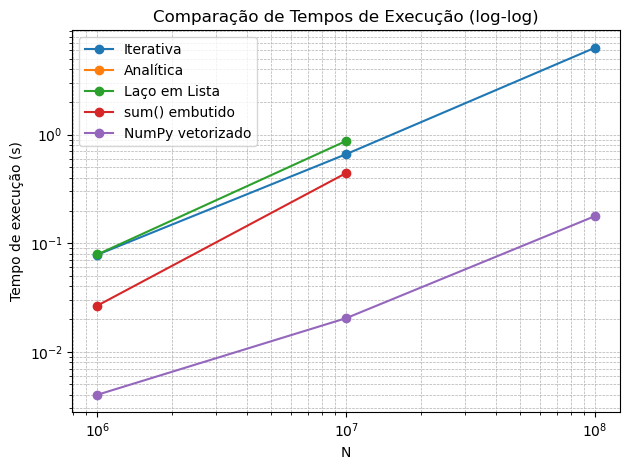

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Definição das funções de soma ---

def soma_iterativa(n):
    soma = 0
    for numero in range(1, n + 1):
        soma += numero
    return soma

def soma_analitica(n):
    return n * (n + 1) // 2

def soma_lista_for(n):
    lista = list(range(1, n + 1))
    soma = 0
    for numero in lista:
        soma += numero
    return soma

def soma_lista_sum(n):
    lista = list(range(1, n + 1))
    return sum(lista)

def soma_numpy(n):
    arr = np.arange(1, n + 1)
    return arr.sum()


# --- Valores de N para cada parte ---
Ns_a = [10**6, 10**7, 10**8]   # para parte a e parte d
Ns_b = [10**6, 10**7]          # para parte b


# --- Coleta dos tempos de execução ---
resultados = []

# Parte a: iterativa vs. analítica
for n in Ns_a:
    inicio = time.time()
    soma_iterativa(n)
    resultados.append({"Método": "Iterativa", "N": n, "Tempo (s)": time.time() - inicio})
    
    inicio = time.time()
    soma_analitica(n)
    resultados.append({"Método": "Analítica", "N": n, "Tempo (s)": time.time() - inicio})

# Parte b: laço em lista vs. sum() embutido
for n in Ns_b:
    inicio = time.time()
    soma_lista_for(n)
    resultados.append({"Método": "Laço em Lista", "N": n, "Tempo (s)": time.time() - inicio})
    
    inicio = time.time()
    soma_lista_sum(n)
    resultados.append({"Método": "sum() embutido", "N": n, "Tempo (s)": time.time() - inicio})

# Parte d: NumPy vetorizado
for n in Ns_a:
    inicio = time.time()
    soma_numpy(n)
    resultados.append({"Método": "NumPy vetorizado", "N": n, "Tempo (s)": time.time() - inicio})


# --- Exibição dos resultados ---
df = pd.DataFrame(resultados)
print(df.to_string(index=False))   # Imprime tabela completa no console


# --- Gráfico comparativo (escala log-log) ---
plt.figure()
for metodo in df["Método"].unique():
    df_met = df[df["Método"] == metodo]
    plt.loglog(df_met["N"], df_met["Tempo (s)"], marker='o', label=metodo)
plt.xlabel("N")
plt.ylabel("Tempo de execução (s)")
plt.title("Comparação de Tempos de Execução (log-log)")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()


   N    | Soma ↑      | Soma ↓      | Erro Relativo
--------+-------------+-------------+--------------
     10 |  2.92896825 |  2.92896825 | 0.00e+00
    126 |  5.41746058 |  5.41746058 | 1.64e-16
   2120 |  8.23662286 |  8.23662286 | 0.00e+00
  35564 | 11.05631889 | 11.05631889 | 1.61e-16
 596362 | 13.87581965 | 13.87581965 | 2.56e-16
10000000 | 16.69531137 | 16.69531137 | 1.28e-15


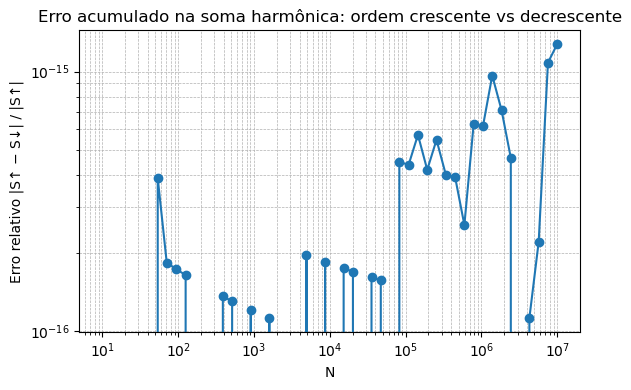

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def soma_harmonica_crescente(N):
    """∑_{n=1}^N 1/n em ponto flutuante, ordem crescente."""
    return np.sum(1.0 / np.arange(1, N+1))

def soma_harmonica_decrescente(N):
    """∑_{n=N}^1 1/n em ponto flutuante, ordem decrescente."""
    return np.sum(1.0 / np.arange(N, 0, -1))

def erro_relativo(s_cres, s_dec):
    """Erro relativo entre duas somas: |cres - dec| / |cres|."""
    return np.abs(s_cres - s_dec) / np.abs(s_cres)

# Vetor de valores de N para teste (crescendo exponencialmente)
Ns = np.logspace(1, 7, num=50, dtype=int)  # de N=10 até N=10^7, 50 pontos

erros = []
for N in Ns:
    s_up   = soma_harmonica_crescente(N)
    s_down = soma_harmonica_decrescente(N)
    erros.append(erro_relativo(s_up, s_down))

erros = np.array(erros)

# Imprime alguns valores destacados
print("   N    | Soma ↑      | Soma ↓      | Erro Relativo")
print("--------+-------------+-------------+--------------")
for i in np.linspace(0, len(Ns)-1, 6, dtype=int):
    N = Ns[i]
    s_up = soma_harmonica_crescente(N)
    s_down = soma_harmonica_decrescente(N)
    err = erros[i]
    print(f"{N:7d} | {s_up:11.8f} | {s_down:11.8f} | {err:.2e}")

# Plot do erro relativo vs N em escala log-log
plt.figure(figsize=(6,4))
plt.loglog(Ns, erros, marker='o', linestyle='-')
plt.xlabel("N")
plt.ylabel("Erro relativo |S↑ − S↓| / |S↑|")
plt.title("Erro acumulado na soma harmônica: ordem crescente vs decrescente")
plt.grid(True, which='both', ls='--', lw=0.5)
plt.tight_layout()
plt.show()


Exemplo de cancelamento catastrófico:
Float64: 1.1102230246251565e-15
Float32: 1.1920929e-07


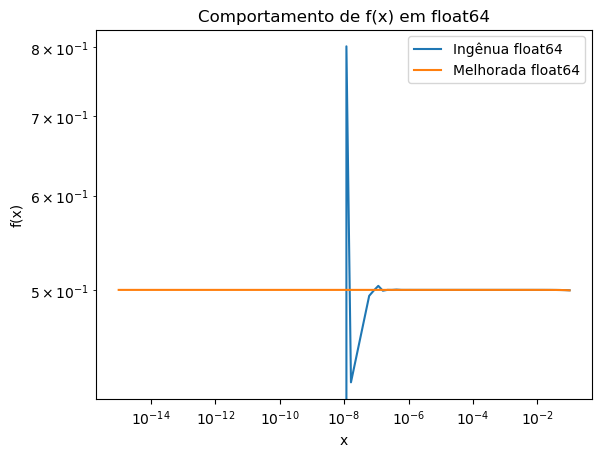

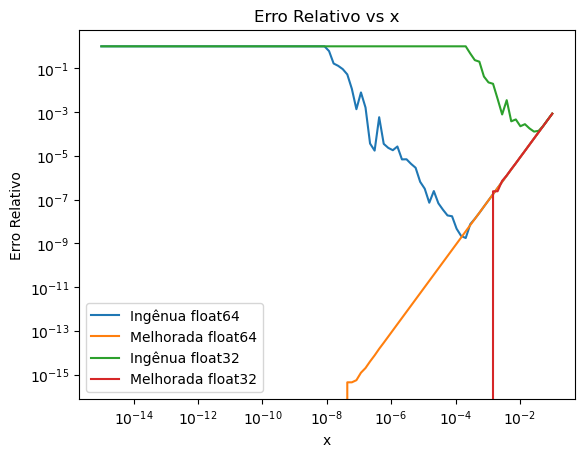

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Cancelamento catastrófico: subtração de valores muito próximos perde precisão.
# Exemplo adicional:
a64 = np.float64(1.000000000000001)
b64 = np.float64(1.0)
diff64 = a64 - b64

a32 = np.float32(1.0000001)
b32 = np.float32(1.0)
diff32 = a32 - b32

print("Exemplo de cancelamento catastrófico:")
print("Float64:", diff64)
print("Float32:", diff32)

# Definição das funções
def f_ingenua(x):
    return (1 - np.cos(x)) / x**2

def f_melhorada(x):
    return 2 * np.sin(x/2)**2 / x**2

# Geração dos valores de x de 1e-1 até 1e-15
x = np.logspace(-1, -15, num=100)

# Cálculos em precisão dupla (float64)
x64 = x.astype(np.float64)
f_ingenua64 = f_ingenua(x64)
f_melhorada64 = f_melhorada(x64)

# Cálculos em precisão simples (float32)
x32 = x.astype(np.float32)
f_ingenua32 = f_ingenua(x32).astype(np.float32)
f_melhorada32 = f_melhorada(x32).astype(np.float32)

# Valor teórico do limite
valor_teorico = 0.5

# Cálculo dos erros relativos
erro_ingenua64 = np.abs(f_ingenua64 - valor_teorico) / valor_teorico
erro_melhorada64 = np.abs(f_melhorada64 - valor_teorico) / valor_teorico
erro_ingenua32 = np.abs(f_ingenua32 - valor_teorico) / valor_teorico
erro_melhorada32 = np.abs(f_melhorada32 - valor_teorico) / valor_teorico

# Gráfico 1: f(x) vs x em float64
plt.figure()
plt.loglog(x, f_ingenua64, label='Ingênua float64')
plt.loglog(x, f_melhorada64, label='Melhorada float64')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comportamento de f(x) em float64')
plt.legend()
plt.show()

# Gráfico 2: Erro relativo vs x para todas as versões
plt.figure()
plt.loglog(x, erro_ingenua64, label='Ingênua float64')
plt.loglog(x, erro_melhorada64, label='Melhorada float64')
plt.loglog(x, erro_ingenua32, label='Ingênua float32')
plt.loglog(x, erro_melhorada32, label='Melhorada float32')
plt.xlabel('x')
plt.ylabel('Erro Relativo')
plt.title('Erro Relativo vs x')
plt.legend()
plt.show()


Exemplo de cancelamento catastrófico:
Float64: 1.000000000000001 - 1.0 = 1.1102230246251565e-15
Float32: 1.0000001 - 1.0 = 1.1920929e-07


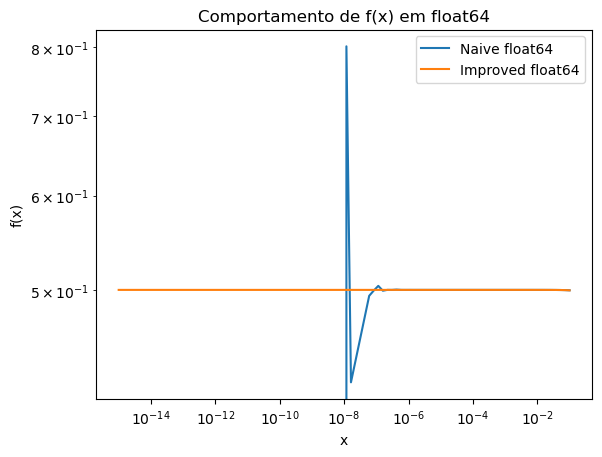

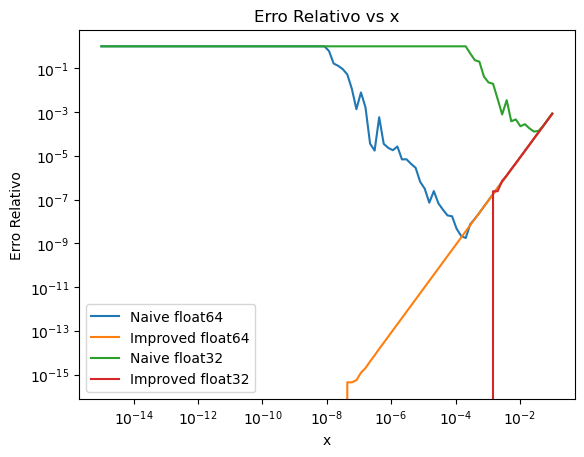

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Cancelamento catastrófico: operação de subtração entre valores muito próximos perde precisão.
# Exemplo adicional: subtração de dois números quase iguais em float32 e float64
a64 = np.float64(1.000000000000001)
b64 = np.float64(1.0)
diff64 = a64 - b64

a32 = np.float32(1.0000001)
b32 = np.float32(1.0)
diff32 = a32 - b32

print("Exemplo de cancelamento catastrófico:")
print("Float64: 1.000000000000001 - 1.0 =", diff64)
print("Float32: 1.0000001 - 1.0 =", diff32)

# Definição das funções f_naive e f_improved
def f_naive(x):
    return (1 - np.cos(x)) / x**2

def f_improved(x):
    return 2 * np.sin(x/2)**2 / x**2

# Valores de x de 1e-1 até 1e-15
x = np.logspace(-1, -15, num=100)

# Cálculos em float64
x64 = x.astype(np.float64)
f_naive64 = f_naive(x64)
f_improved64 = f_improved(x64)

# Cálculos em float32
x32 = x.astype(np.float32)
f_naive32 = f_naive(x32).astype(np.float32)
f_improved32 = f_improved(x32).astype(np.float32)

# Valor teórico limite
theoretical = 0.5

# Erros relativos
err_naive64 = np.abs(f_naive64 - theoretical) / theoretical
err_improved64 = np.abs(f_improved64 - theoretical) / theoretical
err_naive32 = np.abs(f_naive32 - theoretical) / theoretical
err_improved32 = np.abs(f_improved32 - theoretical) / theoretical

# Gráfico 1: f(x) vs x para float64
plt.figure()
plt.loglog(x, f_naive64, label='Naive float64')
plt.loglog(x, f_improved64, label='Improved float64')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comportamento de f(x) em float64')
plt.legend()
plt.show()

# Gráfico 2: Erro relativo vs x para ambas as precisões e versões
plt.figure()
plt.loglog(x, err_naive64, label='Naive float64')
plt.loglog(x, err_improved64, label='Improved float64')
plt.loglog(x, err_naive32, label='Naive float32')
plt.loglog(x, err_improved32, label='Improved float32')
plt.xlabel('x')
plt.ylabel('Erro Relativo')
plt.title('Erro Relativo vs x')
plt.legend()
plt.show()
